# DAT102x: Predicting Chronic Hunger

`Daniel S.A.O Otieno` `Email: inetkenya@gmail.com`

## Loading the dataset

Before you can start visualization, you must load the dataset. The code in the cell below loads the data and performs some data cleaning. 

As a first step execute the code in the cell below to import the Python packages you will need for the rest of this notebook. Notice the IPython "magic" command `%matplotlib inline`. The `%` tells the Python interpreter that this is the start of a magic command; a command which configures the execution environment. The `matplotlib inline` magic indicates that you want to display graphics inline within the notebook. Execute this code 

In [19]:
import pandas as pd
from pandas import DataFrame, Series
from pandas.tools.plotting import scatter_matrix
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
from sklearn import feature_selection as fs
from sklearn import metrics, cross_validation
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

sns.set(style="whitegrid")


In [20]:
##Loading data from values & labels to observe the patterns

train_val_df = pd.read_csv('DAT102x_Predicting_Chronic_Hunger_-_Training_values.csv')
train_label_df = pd.read_csv('DAT102x_Predicting_Chronic_Hunger_-_Training_labels.csv')



In [21]:
train_val_df.head()

,row_id,country_code,year,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,droughts_floods_extreme_temps,forest_area,total_land_area,fertility_rate,...,open_defecation,hiv_incidence,rail_lines_density,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability
0,0,889f053,2002,235077.658128,38.558520,935.754365,NaN,5397.737544,537408.312513,5.928981,...,28.933529,0.009975,NaN,52.433239,15485.148165,14.788020,4.350521e+06,7.021072,0.698153,-1.393801
1,1,9e614ab,2012,23000.640738,21.282631,4031.452161,NaN,178336.529912,232013.631676,3.000629,...,29.665789,0.029840,NaN,77.715574,1696.458184,0.687018,3.262614e+06,0.198831,25.101826,0.030556
2,2,100c476,2000,90.954867,4.317080,1581.935278,NaN,101.780566,445.037137,2.301860,...,1.331621,NaN,NaN,91.150981,338.795191,NaN,NaN,NaN,5.395413,0.651586
3,3,4609682,2013,100843.661212,16.636618,1127.626364,NaN,10348.866929,154616.148188,2.199311,...,1.549191,0.010186,1.277096,99.030403,27377.802600,15.948356,3.979141e+06,1.626305,26.735951,-0.928788
4,4,be2a7f5,2008,224.289357,NaN,1418.987212,NaN,460.113424,740.295659,NaN,...,7.564733,NaN,NaN,91.930367,134.258083,NaN,NaN,NaN,19.136813,0.956027


In [22]:
train_label_df.head()

,row_id,prevalence_of_undernourishment
0,0,31.260713
1,1,18.298233
2,2,39.513397
3,3,4.444016
4,4,4.940301


In [23]:
#merging of the data from the values and labels of the 2 training data sets 
train_main_df = pd.merge(train_val_df, train_label_df, how='left', on=['row_id'])

train_main_df.head()

,row_id,country_code,year,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,droughts_floods_extreme_temps,forest_area,total_land_area,fertility_rate,...,hiv_incidence,rail_lines_density,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability,prevalence_of_undernourishment
0,0,889f053,2002,235077.658128,38.558520,935.754365,NaN,5397.737544,537408.312513,5.928981,...,0.009975,NaN,52.433239,15485.148165,14.788020,4.350521e+06,7.021072,0.698153,-1.393801,31.260713
1,1,9e614ab,2012,23000.640738,21.282631,4031.452161,NaN,178336.529912,232013.631676,3.000629,...,0.029840,NaN,77.715574,1696.458184,0.687018,3.262614e+06,0.198831,25.101826,0.030556,18.298233
2,2,100c476,2000,90.954867,4.317080,1581.935278,NaN,101.780566,445.037137,2.301860,...,NaN,NaN,91.150981,338.795191,NaN,NaN,NaN,5.395413,0.651586,39.513397
3,3,4609682,2013,100843.661212,16.636618,1127.626364,NaN,10348.866929,154616.148188,2.199311,...,0.010186,1.277096,99.030403,27377.802600,15.948356,3.979141e+06,1.626305,26.735951,-0.928788,4.444016
4,4,be2a7f5,2008,224.289357,NaN,1418.987212,NaN,460.113424,740.295659,NaN,...,NaN,NaN,91.930367,134.258083,NaN,NaN,NaN,19.136813,0.956027,4.940301


In [24]:
train_main_df.shape

(1401, 47)

In [25]:
train_main_df.describe()

,row_id,year,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,droughts_floods_extreme_temps,forest_area,total_land_area,fertility_rate,life_expectancy,...,hiv_incidence,rail_lines_density,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability,prevalence_of_undernourishment
count,1401.000000,1401.000000,1.385000e+03,1153.000000,1337.000000,75.000000,1.385000e+03,1.401000e+03,1387.000000,1386.000000,...,1030.000000,457.000000,1397.000000,1.317000e+03,1337.000000,1.337000e+03,1128.000000,1258.000000,1266.000000,1401.000000
mean,700.000000,2007.392577,3.539588e+05,27.891446,2753.178229,1.236800,2.329455e+05,8.181146e+05,3.251874,67.114055,...,0.218624,1.183129,73.795389,8.304671e+04,8.580335,1.871233e+07,1.919332,15.618462,-0.376020,15.510697
std,404.578175,4.595501,1.172377e+06,28.577625,2777.815145,1.877823,9.266334e+05,2.792117e+06,1.471044,8.786850,...,0.523960,1.175000,31.280311,2.248360e+05,6.645133,6.112347e+07,1.480842,10.324280,0.858888,11.610440
min,0.000000,2000.000000,2.944179e+00,0.000000,179.258873,0.000000,9.806688e+00,2.018306e+01,0.836053,38.204140,...,0.009800,0.000000,0.010012,1.008288e+02,0.491115,3.490659e+04,0.000000,0.000000,-2.781258,2.493428
25%,350.000000,2003.000000,1.174577e+04,3.490956,1424.503830,0.097420,4.159005e+03,2.507460e+04,2.175432,61.677998,...,0.010164,0.297713,51.062336,1.265778e+03,3.748595,9.076810e+05,1.033886,8.575444,-0.948167,5.710856
50%,700.000000,2007.000000,4.701980e+04,18.846225,2221.920986,0.661379,2.224170e+04,1.309442e+05,2.751553,69.857724,...,0.040068,0.608198,89.156218,7.637910e+03,6.633461,3.411048e+06,1.538130,13.093035,-0.287659,12.118656
75%,1050.000000,2011.000000,2.247874e+05,41.954776,3296.467202,1.318327,1.255963e+05,6.261072e+05,4.227445,73.706476,...,0.166766,1.869188,98.708971,4.689573e+04,11.454023,1.117916e+07,2.325482,21.614527,0.200449,22.447492
max,1400.000000,2015.000000,1.045780e+07,101.906349,27978.265095,9.177338,8.243222e+06,2.403061e+07,7.544631,84.771403,...,4.269284,4.867161,101.996650,2.265183e+06,37.977184,4.985771e+08,13.326110,64.773806,1.376322,59.089781


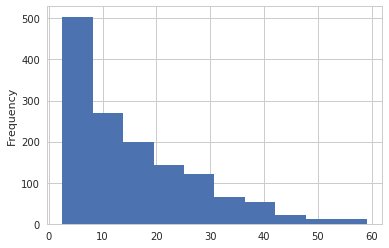

In [26]:
under_nourish = train_main_df['prevalence_of_undernourishment']

under_nourish.plot(kind='hist')

TypeError: cannot perform reduce with flexible type

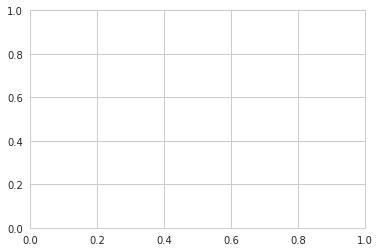

In [30]:
under_nourish = train_main_df['prevalence_of_undernourishment']
sns.distplot('under_nourish')

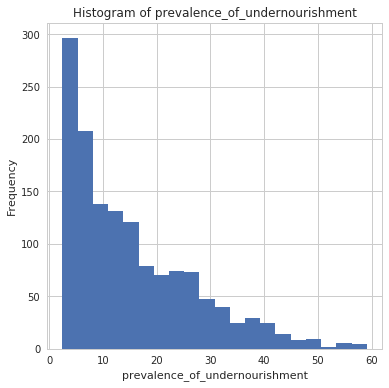

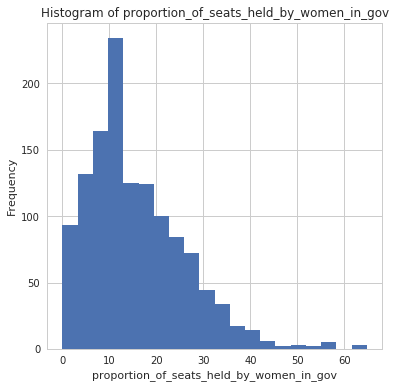

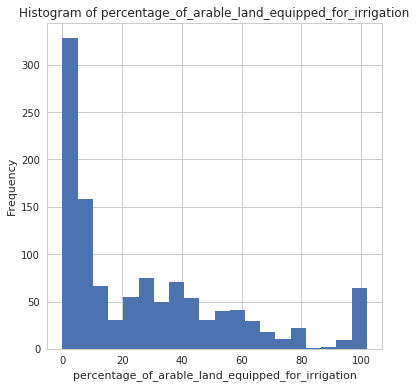

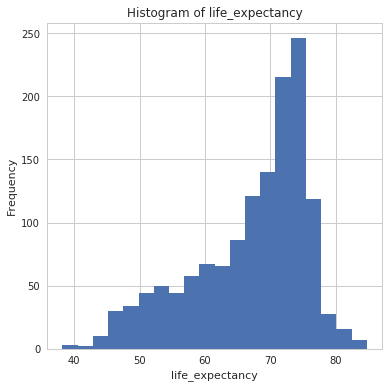

In [27]:
def plot_histogram(train_main_df, cols, bins = 20):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        train_main_df[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Frequency')# Set text for y axis
        plt.show()
        
num_cols = ['prevalence_of_undernourishment', 'proportion_of_seats_held_by_women_in_gov', 'percentage_of_arable_land_equipped_for_irrigation', 'life_expectancy']    
plot_histogram(train_main_df, num_cols)